In [1]:
import praw
import pandas as pd
import datetime as dt
from IPython import display
import math
from pprint import pprint
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
reddit = praw.Reddit(client_id='XXX', \
                     client_secret='XXX-XXX', \
                     user_agent='PortlandCrime / Domestic Violence and Child Welfare in Portland, ME', \
                     username='GBarboza-336', \
                     password='XXXX')
headlines = set()

In [3]:
#subreddit = reddit.subreddit('CPTSD')
subreddit = reddit.subreddit('socialwork')
for submission in reddit.subreddit('socialwork').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

973


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    cw_score = sia.polarity_scores(line)
    cw_score['headline'] = line
    results.append(cw_score)

pprint(results[:6], width=100)

C:\Users\g.barboza\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'compound': 0.0,
  'headline': 'Am I burnt out or am I coming to terms with not wanting to be a SW anymore?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Do you keep a reflective journal? Why/why not?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4939,
  'headline': 'I\'m having a tough time with understanding "enabling," tough love, and letting '
              'people hit "rock bottom..."',
  'neg': 0.156,
  'neu': 0.625,
  'pos': 0.219},
 {'compound': 0.0,
  'headline': 'Career Advice...Fellowship to Ph.D.? Advice on next steps?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Transitioning Back Into Social Work',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.0516, 'headline': 'When to leave?', 'neg': 0.375, 'neu': 0.625, 'pos': 0.0}]


In [5]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.0000,Am I burnt out or am I coming to terms with no...,0.000,1.000,0.000
1,0.0000,Do you keep a reflective journal? Why/why not?,0.000,1.000,0.000
2,0.4939,"I'm having a tough time with understanding ""en...",0.156,0.625,0.219
3,0.0000,Career Advice...Fellowship to Ph.D.? Advice on...,0.000,1.000,0.000
4,0.0000,Transitioning Back Into Social Work,0.000,1.000,0.000


In [6]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.0000,Am I burnt out or am I coming to terms with no...,0.000,1.000,0.000,0
1,0.0000,Do you keep a reflective journal? Why/why not?,0.000,1.000,0.000,0
2,0.4939,"I'm having a tough time with understanding ""en...",0.156,0.625,0.219,1
3,0.0000,Career Advice...Fellowship to Ph.D.? Advice on...,0.000,1.000,0.000,0
4,0.0000,Transitioning Back Into Social Work,0.000,1.000,0.000,0


In [7]:
df2 = df[['headline', 'label']]
df2.to_csv('CPTSD_headlines_labels1.csv', mode='a', encoding='utf-8', index=False)
df2.head()

,headline,label
0,Am I burnt out or am I coming to terms with no...,0
1,Do you keep a reflective journal? Why/why not?,0
2,"I'm having a tough time with understanding ""en...",1
3,Career Advice...Fellowship to Ph.D.? Advice on...,0
4,Transitioning Back Into Social Work,0


In [8]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['I\'m having a tough time with understanding "enabling," tough love, and letting people hit "rock bottom..."',
 'For those of us needing inspiration',
 'Best books/podcasts/tv shows for social workers?',
 'What skills &/or strengths were you surprised to discover, possess, develop, or receive praise for as a social worker?',
 'Ethical quandary: client in LTC getting kicked out for smoking']

Negative headlines:

['Received Violent Threats at Work Today',
 'Is there a line between empathizing with someone who did something harmful and denying agency in an individual?',
 'A client’s family has been harassing me while I was in the hospital',
 'Process Recording Frustration',
 'Social work feels like getting paid to be abused.']


In [9]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    573
 1    226
-1    174
Name: label, dtype: int64
 0    58.890031
 1    23.227133
-1    17.882837
Name: label, dtype: float64


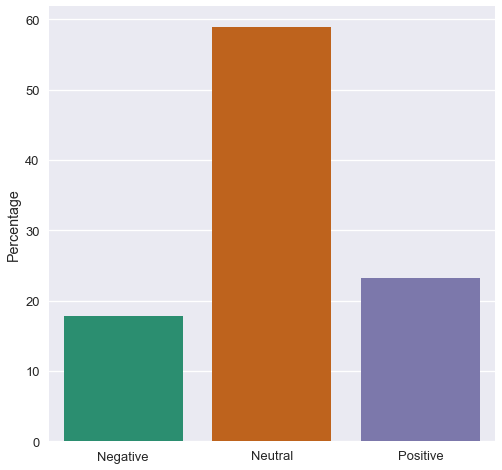

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [11]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [12]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [13]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [14]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [15]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('social', 52),
 ('work', 32),
 ('like', 21),
 ('workers', 17),
 ('job', 17),
 ('worker', 15),
 ('help', 15),
 ('best', 13),
 ('care', 11),
 ('would', 10),
 ('good', 9),
 ('share', 9),
 ('clients', 8),
 ('career', 8),
 ('week', 8),
 ('advice', 8),
 ('please', 8),
 ('support', 8),
 ('love', 7),
 ('life', 7)]

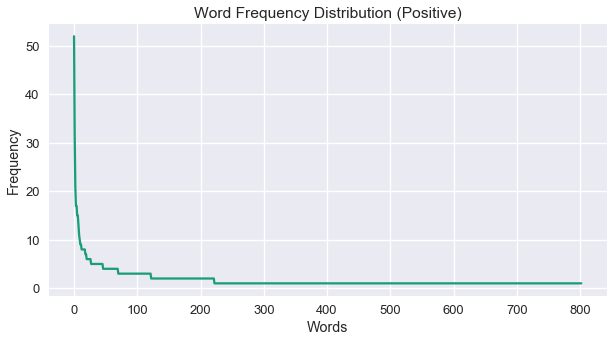

In [16]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

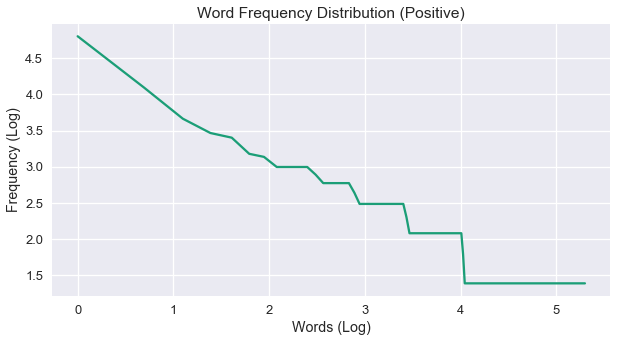

In [17]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [18]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('social', 32),
 ('work', 28),
 ('worker', 16),
 ('crisis', 11),
 ('client', 8),
 ('job', 8),
 ('new', 7),
 ('mental', 6),
 ('today', 5),
 ('stress', 5),
 ('loss', 5),
 ('advice', 5),
 ('frustrated', 5),
 ('program', 5),
 ('struggling', 5),
 ('want', 5),
 ('feel', 5),
 ('clients', 5),
 ('grief', 5),
 ('someone', 4)]

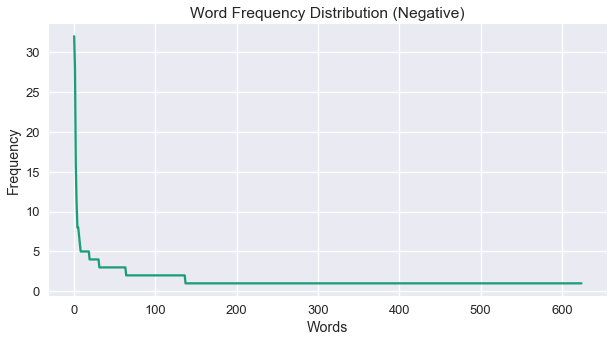

In [19]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

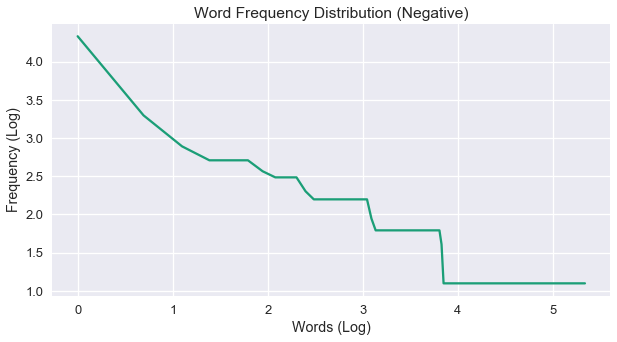

In [20]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [21]:
import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

In [22]:
df = pd.read_csv('C:/Users/g.barboza/CPTSD_headlines_labels1.csv', encoding='utf-8')
df.head()

,headline,label
0,I’m touched that people are paying efforts to ...,-1
1,How exactly does wraparound work?,0
2,Be honest: The Nightmare of Productivity,1
3,Just passed my LMSW exam!,0
4,Advice/Boundaries,0


In [23]:
df = df[df.label != 0]
df.label.value_counts()

0        4281
1        1823
-1       1715
label       7
Name: label, dtype: int64

In [24]:
top_subreddit = subreddit.top()

In [25]:
hot_subreddit = subreddit.hot(limit=1000)

In [26]:
top_subreddit = subreddit.top(limit=1000)

In [27]:
for submission in subreddit.top(limit=10):
    print(submission.title, submission.id)

Choosing a therapist... 9szkw7
I have never seen something I relate so deeply with in my life 8onvmc
Most accurate thing I've seen 82t62g
Makes sense 8mztyf
I'm tired. 9xysvg
When a client calls at 4:55 on a Friday. 9vvw4u
surprised pikachu meme, counseling edition a839ta
I graduated today with my MSW. Do you guys like my cap? 8j8qnt
Avoiding inappropriate self disclosure with a client a5t46j
Happy Thanksgiving ! 9ze47q


In [28]:
for submission in subreddit.hot(limit=10):
    print(submission.title, submission.id)

Weekly School of Social Work/New to Social Work Questions afgxhv
Counseling Teenagers in a nutshell ag9aox
Watching self-determination in action and feeling frustrated ag9bcd
Tips for keeping a high case load organized? ag3ub3
Having a tough time ag8w9l
Grant writing for specific fund? aga1at
Has anyone ever used or heard of someone using their social work qualifications to emigrate? ag9xwi
Something I need to say about the exam... ag9dam
What modalities are you most familiar with? ag4oii
How to handle all the barriers that come with trying to help clients? afyavf


In [29]:
topics_dict = { "title":[], "score":[], "id":[], "url":[], "comms_num": [], "created": [], "body":[]}

In [30]:
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [31]:
topics_data = pd.DataFrame(topics_dict)
topics_data.drop_duplicates(subset=['id'], inplace=True)
topics_data

,title,score,id,url,comms_num,created,body
0,Choosing a therapist...,430,9szkw7,https://i.redd.it/t43mif8hdjv11.jpg,11,1.541027e+09,
1,I have never seen something I relate so deeply...,394,8onvmc,https://i.redd.it/r0yb35vgy3211.jpg,73,1.528201e+09,
2,Most accurate thing I've seen,312,82t62g,https://imgur.com/3hixq0m,17,1.520496e+09,
3,Makes sense,300,8mztyf,https://i.redd.it/9f2sjbg59t011.jpg,12,1.527635e+09,
4,I'm tired.,291,9xysvg,https://i.redd.it/1fb7cismrxy11.jpg,24,1.542509e+09,
5,When a client calls at 4:55 on a Friday.,275,9vvw4u,https://v.redd.it/un3u8nhubjx11,19,1.541898e+09,
6,"surprised pikachu meme, counseling edition",270,a839ta,https://i.redd.it/7070obqddi521.jpg,6,1.545373e+09,
7,I graduated today with my MSW. Do you guys lik...,255,8j8qnt,https://i.redd.it/zbtd1fgz8qx01.jpg,28,1.526291e+09,
8,Avoiding inappropriate self disclosure with a ...,253,a5t46j,https://v.redd.it/cqokajfvh1421,15,1.544733e+09,
9,Happy Thanksgiving !,248,9ze47q,https://i.redd.it/7co7w6pxwvz11.jpg,12,1.542922e+09,


In [32]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [33]:
_timestamp = topics_data["created"].apply(get_date)

In [34]:
topics_data = topics_data.assign(timestamp = _timestamp)

In [36]:
topics_data.to_csv('FILENAME.csv') 